# 0.0.Entendendo o Problema

- 1.Objetivo do Projeto:
    - 1.1.Classificar se o cliente vai ser inadimplente ou não.
    
    
- 2.Por que o projeto está sendo requistado?
    - 2.1.Acredito que seja pelo motivo de que a empresa está desenvolvendo um sistema de crédito automatico que de um limite adequado para a situação que o cliente está, pois caso a empresa de um emprestimo muito alto para clientes que vão ser possivelmente inadimplentes ela vai está pedenndo dinheiro, pois terá muito mais prejuizo do lucro com esse cliente, em contra partida também temos os clientes que não vão ser inadimplentes e esses sim deve receber um crédito alto para que se fidelizem com o banco e gastem mais, acredito que seja isso.
    
    
- 3.Qual métrica do negócio o projeto vai afetar?

    - 3.1.Em outras palavras onde o projeto vai ajudar a empresa a ganhar mais dinheiro? bem, acredito que os bancos ganhem dinheiro através dos juros pois quando emprestam uma quantidade x para o cliente tendem a receber uma quantidade y maior do que deram, ou seja, o projeto vai afetar na métrica de aumento do lucro da empresa e a queda do prejuizo, pois no fim uma das grandes formas dos bancos ganharem dinherio e através desse metódo.
        - Receita = juros que vem dos créditos
        - + Mais clientes(não inadimplente) + juros = Receita.
        
    - 3.2.No fim vamos buscar melhorar a métrica de juros, pois a empresa sabendo qual e o cliente com menos chance de ser inadimplente vai poder investir mais nele, e esse investimento ira trazer mais juros pois o cliente vai gasta mais, e isso vai fazer o faturamento da empresa aumentar.
 
 
- 4.Proposta de Solução
    - 4.1.Para resolver esse problema eu vou criar um modelo de Machine Learning que consiga indentificar quais são os clientes com maiores chances de serem inadimplentes, o modelo vai pedir as informações sobre o cliente e no fim retorna a classificação dele, para fazer isso será necessario passar por diversos ciclos para indentificação de problemas, pois cada problema dependendo da proporção vai gerar um novo ciclo, por exemplo certamente vamos está lidando com dados desbalaceandos, estão vamos precisa de um ciclo de balanceamento de dados.
    
- 5.O que será entrgue no fim?
    - 5.1.No fim dos ciclos do projeto eu espero ter um modelo que Tenha uma precisão de indentificar clientes inadimplente maior de 75%
    - 5.2.Um WebApp que vai funciona da seguiente forma:
        - input: Dados do clientes, as features que o modelo usou para indentificar se vai inadimplente ou não.
        - output: Uma foto que sendo verde significa que o cliente não vai ser inadimplente e caso ele for inadimplente retorna uma foto vermelha.
        
        
obs: Eu sei que existem outras formas dos bancos ganherem dinheiro, mas vou simplificar aqui falando apenas do juros, já que e a métrica que vamos buscar melhorar.

# 1.0.Imports

In [1]:
#Libraries Paddron
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import random
#--------------------
#Machine Learning Libraries
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#--------------------
#Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score, cohen_kappa_score
from scikitplot import metrics as mt
#--------------------
#Regex
import re
#--------------------


#Filter Warnings
import warnings
warnings.filterwarnings("ignore")
#-------------------

#Show all columns
pd.set_option('display.max_columns', None)

## 1.1.Load Data

In [2]:
df_raw = pd.read_csv('datasets/acquisition_train.csv')

## 1.2.Help Functions

In [3]:
def cross_validation(model,num_folds,x_train,y_train,verbose=False):
    r2_list  = []
    rmse_list   = []
    mae_list    = []
    mape_list   = []
    
    #generate k-fold
    Kfold = StratifiedKFold(n_splits=num_folds,shuffle=True,random_state=32)
    
    i=1
    for train_ix, val_ix in Kfold.split(X_train,y_train):
        if verbose:
            print('Fold Number: {}/{}'.format(i,num_folds))
        
        #get fold
        x_train_fold = X_train.iloc[train_ix]
        y_train_fold = y_train.iloc[train_ix]
        
        x_val_fold = X_train.iloc[val_ix]
        y_val_fold = y_train.iloc[val_ix]
        
        
        #Model train
        model.fit(x_train_fold,y_train_fold)

        #prediction
        pred_nn = model.predict(x_val_fold)
        
        #Metrics
        acc = accuracy_score(y_val_fold,pred_nn)
        print('Acurracy: {:.2%}'.format(acc))
        
        balacend_acc = balanced_accuracy_score(y_val_fold,pred_nn)
        print('Balacend Acurracy: {:.2%}'.format(balacend_acc))

        #Kappa Metric
        kappa_acc = cohen_kappa_score(y_val_fold,pred_nn)
        print('Kappa Score: {:.2%}'.format(kappa_acc))

        #classification_report
        print(classification_report(y_val_fold,pred_nn))

        #plot confusion matrix
        mt.plot_confusion_matrix(y_val_fold, pred_nn, normalize=True, figsize=(6,6));
        
        return None


def data_dimensions(df):
    print('Number of Rows: {}'.format(df.shape[0]))
    print('Number of Columns: {}'.format(df.shape[1]))
    return None


def cramer_v(x,y):
    cm = pd.crosstab(x,y).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = stats.chi2_contingency(cm)[0]
    chi2corr = max(0,chi2-(k-1)*(r-1)/(n-1))
    
    kcorr= k - (k-1)**2/(n-1)
    rcorr= r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / (min(kcorr-1,rcorr-1) ))

# 2.0.Data Description

In [4]:
df1 = df_raw.copy()
df1.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


## 2.1.Data Dimensions

In [5]:
data_dimensions(df1)

Number of Rows: 45000
Number of Columns: 43


## 2.2.Data types

In [6]:
df1.dtypes

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

## 2.3.Change types

In [7]:
#None

## 2.4.Check NA values

**Removendo colunas:**
Todas as colunas que tiverem 50% ou mais de valores nulos eu vou remover, pelo motivo de eu não querer mudar o fenomeno que estou tentando modelar, pois vou acabar inviezando o modelo e criando algo que não condiz com a realidade.

In [8]:
aux = pd.DataFrame(index=df1.isnull().sum().index, data=df1.isnull().sum().values).rename(columns={0:'Values NA'})
aux = aux.sort_values(by='Values NA',ascending=False)
aux['% NA'] = 100*round(df1.isnull().sum() / len(df1),2)
aux[(aux['Values NA'] > 0) & (aux['% NA'] > 50)] #cols to drop

,Values NA,% NA
target_fraud,43478,97.0
last_amount_borrowed,29956,67.0
last_borrowed_in_months,29956,67.0
ok_since,26545,59.0


In [9]:
aux[(aux['Values NA'] > 0) & (aux['% NA'] < 50)] # cols to fill

,Values NA,% NA
external_data_provider_credit_checks_last_year,15124,34.0
credit_limit,13800,31.0
n_issues,11544,26.0
facebook_profile,4458,10.0
marketing_channel,3578,8.0
job_name,3336,7.0
target_default,3259,7.0
external_data_provider_email_seen_before,2233,5.0
lat_lon,1363,3.0
user_agent,722,2.0


## 2.5.FIll or Drop NA values

**Preenchendo valores nulos:**

- Colunas Numericas:

    - Para preecher as variaveis continuas eu analise as médidas de posição central e a distribuição da variavel, para ter certeza que não ia está modificando o fenemeno, então cada variavel que eu substituir o valor pela média e mediana foi pelo fato de está proximo de uma distribuição normal.

- Colunas Categoricas:

  - Já as variaveis categoricas eu busquei substituir pela moda, claro que tenho o conhecimento de que pequenas mundaçãs assim podem inviezar o modelo e fazer ele aprender algo que não condiz com a realidade, mas vai ser um teste, caso eu veja que o modelo não está perfomando bem, principalmente na cross_validation eu volto aqui e faço outra substituição de dados.

In [10]:
cols_na = ['target_fraud','last_amount_borrowed','last_borrowed_in_months','ok_since',
           'external_data_provider_credit_checks_last_2_year', # columns with a large quantity of na valeus (=>50%)
           'user_agent','profile_tags'] #columns I think it has little relevance

df1 = df1.drop(cols_na,axis=1)

### 2.5.1.Fill NA values with mean

In [11]:
#score_3
df1['score_3'] = df1['score_3'].fillna(df1['score_3'].mean())
#risk_rate
df1['risk_rate'] = df1['risk_rate'].fillna(df1['risk_rate'].mean())
#income
df1['income'] = df1['income'].fillna(df1['income'].median())
#n_accounts
df1['n_accounts'] = df1['n_accounts'].fillna(df1['n_accounts'].mean())

### 2.5.2.Fill NA values with median

In [12]:
#n_issues
#method = fill values with median
#reason = because the values is approached to normal distribution
df1['n_issues'] = df1['n_issues'].fillna(df1['n_issues'].median())

### 2.5.3.Fill Na values with mode

In [13]:
#marketing_channel
df1['marketing_channel'] = df1['marketing_channel'].fillna(df1['marketing_channel'].mode(0)[0])

#job_name
df1['job_name'] = df1['job_name'].fillna(df1['job_name'].mode(1)[0])

#external_data_provider_email_seen_before
df1['external_data_provider_email_seen_before'] = df1['external_data_provider_email_seen_before'].fillna(df1['external_data_provider_email_seen_before'].mode(1)[0])

#n_bankruptcies
df1['n_bankruptcies'] = df1['n_bankruptcies'].fillna(df1['n_bankruptcies'].mode(0)[0])

#n_defaulted_loans
df1['n_defaulted_loans'] = df1['n_defaulted_loans'].fillna(df1['n_defaulted_loans'].mode(0)[0])

#reason
df1['reason'] = df1['reason'].fillna(df1['reason'].mode(0)[0])

#channel
df1['channel'] = df1['channel'].fillna(df1['channel'].mode(0)[0])

#score_1
df1['score_1'] = df1['score_1'].fillna(df1['score_1'].mode(0)[0])

#real_state
df1['real_state'] = df1['real_state'].fillna(df1['real_state'].mode(0)[0])

#state
df1['state'] = df1['state'].fillna(df1['state'].mode(0)[0])

#score_2
df1['score_2'] = df1['score_2'].fillna(df1['score_2'].mode(0)[0])

#lat_lon
df1['lat_lon'] = df1['lat_lon'].fillna(df1['lat_lon'].mode(1)[0])

### 2.5.4.Fill NA values with another values

In [14]:
#external_data_provider_credit_checks_last_year
#resoan = substitution with random values to avoid data unbalanced(its a test)
df1['external_data_provider_credit_checks_last_year'] = df1['external_data_provider_credit_checks_last_year'].fillna(random.choice([0,1]))

#credit_limit
#reason = because na values represents to my that this persoan dont have credit limit
df1['credit_limit'] = df1['credit_limit'].fillna(0)


#reason = because Na values in this columns represents to my that person don't have or don't passed zip and facebook profile.
#zip
df1['zip'] = df1['zip'].fillna('no address')
#facebook_profile
df1['facebook_profile'] = df1['facebook_profile'].fillna(False)

In [15]:
#target_default and lat_lon
#reason: target_default: bacause its my target variable
df1 = df1.dropna()

In [16]:
df1.isnull().sum()

ids                                                0
target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
credit_limit                                       0
reason                                             0
income                                             0
facebook_profile                                   0
state                                              0
zip                                                0
channel                                            0
job_name                                           0
real_state                                         0
n_bankruptcies                                

In [17]:
data_dimensions(df1)

Number of Rows: 41741
Number of Columns: 36


## 2.6. Data Cleaning

In [18]:
#cleaning up additional space
df1['target_default'] = df1['target_default'].apply(lambda x: str(x).strip())

## 2.7.Descriptive Analysis

In [19]:
number_attributes = df1.select_dtypes(include=['int64','float64'])
categorical_attributes = df1.select_dtypes(include=['object'])

### Columns Numbers Descriptives

**Analise das Metricas:**

**Filtrando a coluna Income:**
A coluna de income possui valores muito fora da realidade, que podem sim ser verdade pois a nubank pode ter mesmo empresas cliente que ganhem milhões e bilhões, mas são poucos e não e esse o nosso objetivo aqui no projeto, já que queremos descobrir se o cliente vai ser inadimplente ou não, então estamos lidando com pessoas fisicas aqui e não empresas, por esse motivo eu vou filtrar minha coluna de income para pegar apenas as pessoas com renda menor de 300 mil, que já acho que é um limite grande que foge da realidade de muitas pessoas, mas que já vai nos possibilitar ter um modelo mais preciso para pessoas fisicas.

**Filtrando a coluna reported_income:**
Essa coluna eu já venho filtrando desde a primeira etapa, pois ela é uma coluna que possui valores inf que quer dizer infito ou seja um erro na hora de digitar o valor da renda da pessoa ou do sistema, por isso eu vou remover da minha base.

In [20]:
#Central Tendency - Mean - Median - Mode
ct1 = pd.DataFrame(number_attributes.apply(np.mean)).T.round(2)
ct2 = pd.DataFrame(number_attributes.apply(np.median)).T.round(2)
ct3 = pd.DataFrame(number_attributes.apply(lambda x: x.mode()[0])).T.round(2)

#Dispensions - STD - Min - MAX - Range - Skew - Kurtosis
d1 = pd.DataFrame(number_attributes.apply(np.std)).T.round(2)
d2 = pd.DataFrame(number_attributes.apply(min)).T.round(2)
d3 = pd.DataFrame(number_attributes.apply(max)).T.round(2)
d4 = pd.DataFrame(number_attributes.apply(lambda x: x.max() - x.min())).T.round(2)
d5 = pd.DataFrame(number_attributes.apply(lambda x: x.skew())).T.round(2)
d6 = pd.DataFrame(number_attributes.apply(lambda x: x.kurtosis())).T.round(2)

#Concat all metrics
metrics = pd.concat([d2,d3,d4,ct1,ct2,ct3,d1,d5,d6]).T.reset_index()
metrics.columns = ['attributes','min','max','range','mean','median','mode','std','skew','kurtosis']
metrics

,attributes,min,max,range,mean,median,mode,std,skew,kurtosis
0,score_3,0.00,990.00,990.00,346.46,340.00,330.00,110.10,0.35,0.14
1,score_4,86.19,113.98,27.79,100.01,100.02,86.19,3.18,-0.02,0.03
2,score_5,0.00,1.00,1.00,0.50,0.50,0.00,0.29,0.00,-1.19
3,score_6,60.66,142.19,81.53,99.92,99.98,60.66,10.02,-0.02,-0.01
4,risk_rate,0.00,0.90,0.90,0.29,0.29,0.28,0.10,0.48,0.33
5,credit_limit,0.00,448269.00,448269.00,23237.89,11134.00,0.00,33811.45,2.86,14.57
6,income,4821.18,5000027.83,4995206.65,71080.12,60044.09,60025.51,52259.15,24.63,1979.90
7,n_bankruptcies,0.00,5.00,5.00,0.08,0.00,0.00,0.27,3.79,18.69
8,n_defaulted_loans,0.00,5.00,5.00,0.00,0.00,0.00,0.08,23.33,775.04
9,n_accounts,0.00,49.00,49.00,10.64,10.00,9.00,4.59,0.95,1.66


### Columns Categorical  Descriptives

**Analise do Describe:**

Analisando o describe das minhas variaveis categoricas, percebo que existem muitas categorias com valores muito distintos, como por exemplo:

- Reason: Possui mais de 14 mil valores distintos
- zip: Possui 832 valores distintos
- job_name: Possui 30 mil valores distintos
- external_data_provider_first_name: Possui mais de 30 mais valores distintos
- profile_phone_number: Possui mais de 40 mil valores distintos

**Qual o problema de ter colunas com tantos valores distintos?**
O problema e na hora de encondar essas variaveis, pois tantos valores distintos fica complicado de fazer certos tipos de enconders, claro que ainda é possivel e eu vou encondar, mas nessa análise já posso notar algumas colunas que eu acredito que não vão ter relavancia pro modelo, que são:

- external_data_provider_first_name
- profile_phone_number

por serem colunas de informações pessoais da pessoa, ela não tem relavancia na hora de prever se a pessoa vai ser inadimplente ou não, então eu vou remover elas, as outras colunas com muitos valores distintos eu vou encondar, mas isso e nas próximas etapas.

In [21]:
categorical_attributes.describe()

,ids,target_default,score_1,score_2,reason,state,zip,channel,job_name,real_state,application_time_applied,email,external_data_provider_first_name,lat_lon,marketing_channel,profile_phone_number,shipping_state
count,41741,41741,41741,41741,41741,41741,41741,41741,41741,41741,41741,41741,41741,41741,41741,41741,41741
unique,41741,2,7,35,14260,50,823,1,30543,5,33560,6,31183,21596,9,41741,25
top,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,xsd3ZdsI3356I3xMxZeiqQ==,3k2JCQ8Bp5oDwaI39ZJgHA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,18:02:09,gmail.com,jordanio,"(-5.164423488858103, -37.356920426246845)",Website,514-9840782,BR-SP
freq,1,35080,14142,3466,4068,7123,538,41741,2768,20647,6,21034,6,1279,13471,1,6495


# 3.0.Feature Engienner

In [22]:
df2 = df1.copy()
df2.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,False,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,10.0,10.0,00:60:02,6,gmail.com,2,1.0,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,3,1.0,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,11.0,10.0,13:39:03,240,gmail.com,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827


In [23]:
df2.columns

Index(['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'score_6', 'risk_rate', 'credit_limit', 'reason', 'income',
       'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state',
       'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues',
       'application_time_applied', 'application_time_in_funnel', 'email',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_first_name',
       'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel',
       'profile_phone_number', 'reported_income', 'shipping_state',
       'shipping_zip_code'],
      dtype='object')

## News Columns

In [24]:
#Split lat_lon to lat and lon
lat=[]
lon=[]
for i in df1['lat_lon']:
    try:
        lat.append(i.split(',')[0].replace('(','').strip())
        lon.append(i.split(',')[1].replace(')','').strip())
    except:
        lat.append('')
        lon.append(np.NaN)
        
#news features 
df2['lat'] = lat
df2['lon'] = lon

#change dtypes
df2['lat'] = df2['lat'].astype(np.float64)
df2['lon'] = df2['lon'].astype(np.float64)


#Split column with Hour:Minute:Second to Hour, Minute and Second
hour = []
minute = []
second = []

for i in df2['application_time_applied']:
    try:
        hour.append(datetime.strptime(i,'%H:%M:%S').hour)
        minute.append(datetime.strptime(i,'%H:%M:%S').minute)
        second.append(datetime.strptime(i,'%H:%M:%S').second)
    except:
        hour.append(np.NaN)
        minute.append(np.NaN)
        second.append(np.NaN)

#create news columns
df2['hour'] = hour
df2['minute'] = minute
df2['second'] = second

#Drop NA values create by split variables
df2 = df2.dropna()

#change dtypes
df2['hour'] = df2['hour'].astype(int)
df2['minute'] = df2['minute'].astype(int)
df2['second'] = df2['second'].astype(int)

df2['class'] = df2['income'].apply(lambda x: 'low_class' if x < 30000 else
                               'middle_class' if x < 100000 else 'high_class')

#Drop columns
df2 = df2.drop(['application_time_applied','lat_lon'],axis=1)

In [25]:
data_dimensions(df2)

Number of Rows: 38847
Number of Columns: 40


# 4.0.Data Filtering

In [26]:
df3 = df2.copy()
df3.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,lat,lon,hour,minute,second,class
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,18.0,18.0,444,outlook.com,2,0.0,51.0,leidelaura,645,Invite-email,514-9840782,57849.0,BR-MT,17528,-29.151546,-51.138646,7,52,34,middle_class
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,14.0,14.0,346,gmail.com,1,0.0,17.0,diocezio,243,Radio-commercial,251-3659293,4902.0,BR-RS,40933,-19.687711,-47.941515,2,34,29,high_class
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,1.0,0.0,19.0,19.0,406,spgov.com,3,1.0,38.0,venice,815,Waiting-list,261-3543751,1086.0,BR-RN,37825,-17.520650,-39.758011,11,20,49,middle_class
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,11.0,10.0,240,gmail.com,2,1.0,46.0,darzisa,320,Invite-email,102-3660162,198618.0,BR-MT,52827,-16.574259,-39.909901,13,39,3,middle_class
5,538c1908-bd80-b834-c3f0-238b4f536d3f,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,300.0,101.837040,0.915389,90.711273,0.44,61055.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,75024.28,False,JrdZzPZEa/YIIGwh8OdTKA==,kfWDI5wYFHdi9PtKFI9EPg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,9.0,9.0,169,gmail.com,2,1.0,21.0,teomar,811,Website,787-1678197,160198.0,BR-SP,55266,-6.762413,-35.132246,5,27,2,middle_class


## 4.1.Filter Rows

In [27]:
#Drop data with value Infinit and filter income to get values < 300000
df3 = df3[df3['reported_income']!= np.inf]
df3 = df3[df3['income'] < 300000]

## 4.2.Filter columns

In [28]:
cols_remove = ['external_data_provider_first_name','profile_phone_number'] #columns I think it has little relevance
df3 = df3.drop(cols_remove,axis=1)

# 5.0.Data Preparation

In [29]:
df4 = df3.copy()
df4.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,reported_income,shipping_state,shipping_zip_code,lat,lon,hour,minute,second,class
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,18.0,18.0,444,outlook.com,2,0.0,51.0,645,Invite-email,57849.0,BR-MT,17528,-29.151546,-51.138646,7,52,34,middle_class
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,14.0,14.0,346,gmail.com,1,0.0,17.0,243,Radio-commercial,4902.0,BR-RS,40933,-19.687711,-47.941515,2,34,29,high_class
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,1.0,0.0,19.0,19.0,406,spgov.com,3,1.0,38.0,815,Waiting-list,1086.0,BR-RN,37825,-17.520650,-39.758011,11,20,49,middle_class
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,11.0,10.0,240,gmail.com,2,1.0,46.0,320,Invite-email,198618.0,BR-MT,52827,-16.574259,-39.909901,13,39,3,middle_class
5,538c1908-bd80-b834-c3f0-238b4f536d3f,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,300.0,101.837040,0.915389,90.711273,0.44,61055.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,75024.28,False,JrdZzPZEa/YIIGwh8OdTKA==,kfWDI5wYFHdi9PtKFI9EPg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,9.0,9.0,169,gmail.com,2,1.0,21.0,811,Website,160198.0,BR-SP,55266,-6.762413,-35.132246,5,27,2,middle_class


In [30]:
#change text to number
aux = {'False':0,'True':1}
df4['target_default'] = df4['target_default'].map(aux)

# 6.0.Feature Selection

**Removendo colunas categoricas:**
Vou remover todas as colunas do tipo object por agora, pois e necessario fazer uma limpeza de dados mais aprofundada nelas e no processo de Data Preparation e necessario fazer um encondig especifico para cada variavel, eu sei que elas são importantes e eu não vou descartalas vou apenas deixa para usar depois que fizer um tratamento mais adequado, que por agora não é meu objetivo já que nesse primeiro passo o objetivo e apenas ter uma visão geral do problema.

In [31]:
df5 = df4.copy()

In [32]:
cols_number = df5.select_dtypes(include=['int64','float64']).columns
df5 = df5[cols_number]

In [33]:
X = df5.drop('target_default',axis=1)
y = df5['target_default']

# 7.0.Machine Learning Models

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=32)

## 7.1.BaseLine Model

In [35]:
target_list = df5['target_default'].drop_duplicates().sort_values().tolist()
k_num = y_test.shape[0]
target_weights = df5['target_default'].value_counts(normalize=True).sort_index().tolist()

baseline_model = random.choices(population=target_list,
                                k=k_num,
                                weights=target_weights)

## 7.2.GaussianNB

In [36]:
model_gaussian = GaussianNB()

#train model
model_gaussian.fit(X_train,y_train)

#predict
result_gausian = model_gaussian.predict(X_test)

## 7.3.LogisticRegression

In [37]:
model_logic = LogisticRegression()

#train data
model_logic.fit(X_train,y_train)

#predict
result_logic = model_logic.predict(X_test)

# 8.0.Perfomance

### 8.1.Baseline Model

Accuracy: 73.56%
Balacend Acurracy: 50.43%
Kappa Score: 0.87%
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      9709
           1       0.17      0.16      0.17      1874

    accuracy                           0.74     11583
   macro avg       0.50      0.50      0.50     11583
weighted avg       0.73      0.74      0.73     11583



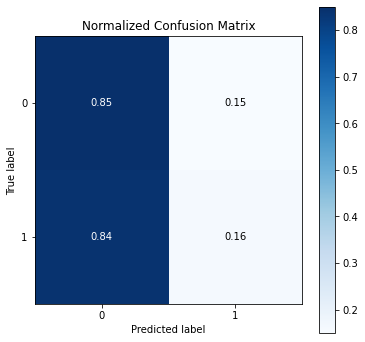

In [38]:
acc = accuracy_score(y_test,baseline_model)
print('Accuracy: {:.2%}'.format(acc))

balacend_acc = balanced_accuracy_score(y_test,baseline_model)
print('Balacend Acurracy: {:.2%}'.format(balacend_acc))

#Kappa Metric
kappa_acc = cohen_kappa_score(y_test,baseline_model)
print('Kappa Score: {:.2%}'.format(kappa_acc))

#classification_report
print(classification_report(y_test,baseline_model))

#plot confusion matrix
mt.plot_confusion_matrix(y_test, baseline_model, normalize=True, figsize=(6,6));

### 8.2.Gaussian

Accuracy: 83.67%
Balacend Acurracy: 49.93%
Kappa Score: -0.22%
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      9709
           1       0.05      0.00      0.00      1874

    accuracy                           0.84     11583
   macro avg       0.45      0.50      0.46     11583
weighted avg       0.71      0.84      0.76     11583



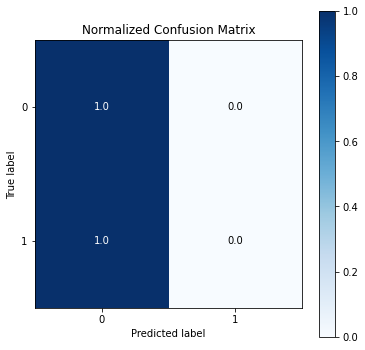

In [39]:
acc = accuracy_score(y_test,result_gausian)
print('Accuracy: {:.2%}'.format(acc))

balacend_acc = balanced_accuracy_score(y_test,result_gausian)
print('Balacend Acurracy: {:.2%}'.format(balacend_acc))

#Kappa Metric
kappa_acc = cohen_kappa_score(y_test,result_gausian)
print('Kappa Score: {:.2%}'.format(kappa_acc))

#classification_report
print(classification_report(y_test,result_gausian))

#plot confusion matrix
mt.plot_confusion_matrix(y_test, result_gausian, normalize=True, figsize=(6,6));

### 8.3.Logistic Regression

Accuracy: 83.82%
Balacend Acurracy: 50.00%
Kappa Score: 0.00%
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      9709
           1       0.00      0.00      0.00      1874

    accuracy                           0.84     11583
   macro avg       0.42      0.50      0.46     11583
weighted avg       0.70      0.84      0.76     11583



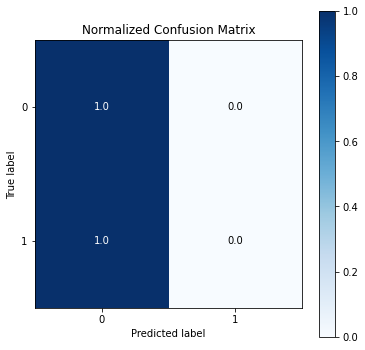

In [40]:
acc = accuracy_score(y_test,result_logic)
print('Accuracy: {:.2%}'.format(acc))

balacend_acc = balanced_accuracy_score(y_test,result_logic)
print('Balacend Acurracy: {:.2%}'.format(balacend_acc))

#Kappa Metric
kappa_acc = cohen_kappa_score(y_test,result_logic)
print('Kappa Score: {:.2%}'.format(kappa_acc))

#classification_report
print(classification_report(y_test,result_logic))

#plot confusion matrix
mt.plot_confusion_matrix(y_test, result_logic, normalize=True, figsize=(6,6));

## 8.3.Cross Validation Performance

### 8.3.1.Gaussian CV

Acurracy: 83.85%
Balacend Acurracy: 50.02%
Kappa Score: 0.05%
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4540
           1       0.18      0.00      0.00       866

    accuracy                           0.84      5406
   macro avg       0.51      0.50      0.46      5406
weighted avg       0.73      0.84      0.77      5406



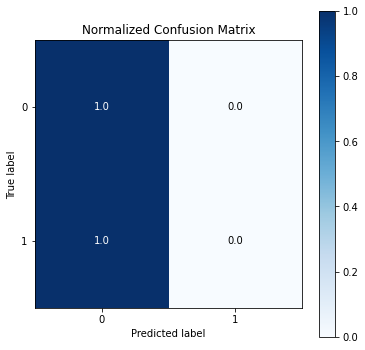

In [41]:
model_gaussian_cv = GaussianNB()
result_gausian_cv = cross_validation(model_gaussian_cv,5,X_train,y_train)

### 8.3.2.Logistic Regression CV

Acurracy: 83.98%
Balacend Acurracy: 50.00%
Kappa Score: 0.00%
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4540
           1       0.00      0.00      0.00       866

    accuracy                           0.84      5406
   macro avg       0.42      0.50      0.46      5406
weighted avg       0.71      0.84      0.77      5406



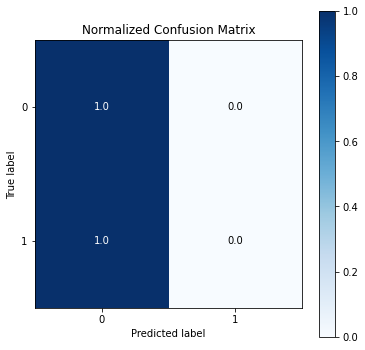

In [42]:
model_logic_cv = LogisticRegression()
result_logic_cv = cross_validation(model_logic_cv,5,X_train,y_train)

# Conclusion
**O que foi feito nesta etapa:**

- Descriptive Analysis:
    
    - Aqui eu realizei uma análise descritiva dos meus dados, utilizando métricas de posição central e dispersão, através disso eu conseguir entender melhor como os meus dados estão se comportando e já ter ideias para a etapa de Data Preparation, pois existem muitas colunas com a distribuição proxima da normal isso e bom pois a maioria dos modelos esperam por isso, outros pontos que pude notar que já estão mais explicados acima, são:
        
        - Valores inf nos dados: Valores infinitos dão um problemão nos dados, através da análise descritiva eu pude tratar esses dados(antes eu so estava filtrando sem saber a coluna.)
        
        - Valores muito alto na feature de income: Nessa feature os valores variavam de 40 mil até 500 milhões, ou seja, um valor maximo muito distante da realidade das pessoas e até de algumas empresas, então eu tomei a decisão de filtrar esses dados para pegar um valor mais coerente com a realidade.
        
   
- Feature Engienner:
    - Aqui eu criei novas colunas que vão me ajudar nas próximas etapas a validar hipoteses de negocio e que juntas não tinham informação tão relavantes e o tipo de dados não era o correto, agora o modelo vai ter mais features para modelar a classificação que estamos tentando prever aqui nesse projeto, também criei as hipoteses que serão validadas na próxima etapa.

**O que sera feito na proxima etapa?**
- Data Balancing and Exploratory Data Analysis:
    - Data Balancing:
        - Aqui finalmente eu vou balancear meus dados para que o modelo consiga ter dado suficiente para encontrar as ocorrências de quando o cliente por inadimplente, pois no momento o desbalaceamento e tanto que o modelo não consegue acertar nenhuma vez quando é inadimplente.
        
    - Exploratory Data Analysis
        - Aqui e uma das partes mais longas do projeto, pois aqui eu vou
            - Analisar univiriada.
            - Verificar a correlação dos meus dados.
            - Validação de Hipóteses.
            - Analise Multivariada.

**Proximo passo:**
- Data Balancing and Exploratory Data Analysis(EDA)